# Tarea 3: Santiago Ontañón Sánchez
# Derivación numérica: diferencias finitas

### NOTA
Este notebook se iniciará en la clase; la resolución completa debe ser enviada como "Tarea3.ipynb", desde su carpeta de tareas. Se puede hacer en equipo, con un máximo de dos personas. Si se hace en equipo, incluyan ambos nombres de manera clara.

En este notebook, implementarán funciones que calculan la derivada numéricamente, de una función $f(x)$ en un punto $x_0$ dado.

## Derivada *derecha*

Definan una función `derivada_derecha` que calcule *numéricamente* la derivada de una función $f(x)$ en una variable (a priori arbitaria) que se debe introducir como argumento, en un punto $x_0$ arbitrario, pero que por default lo hace en  $x_0=0.0$. 

Para esto, utilicen la definición de la derivada:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0)}{h},
\end{equation}

que requiere la especificación de `h`. (Este método se conoce por el nombre de *diferencias finitas*.)

A fin de simular el $\lim_{h\to 0}$, consideren distintos valores de $h$ que precisamente simulen dicho límite. Para cada valor de $h$ calculen el error absoluto del cálculo numérico (respecto al valor *exacto*, que deberán conocer analíticamente). (Para ser concretos, obtengan la derivada de la función de prueba $f(x) = 3x^3-2$, en $x_0=1$.) Dibujen, como función de $h$, el error de su cálculo (usar escala logarítmica en ambos ejes puede ser una buena idea). A partir de eso, ¿qué conclusión podemos sacar sobre *la convergencia* del cálculo numérico de la derivada? 


**Respuesta** Definimos la función que haga de manera sencilla el cálculo. Se definen tres métodos a continuación:

In [1]:
"""
derivada_derecha(f,x,h)

Calcula la derivada derecha de f, una función por el método de las
diferencias finitas. Por default, evalúa en x = 0.0 y establece h=0.00001.
"""

function derivada_derecha(f::Function)
    # Lo primero es pedir explícitamente que el tipo de f sea una función.
    # Después ponemos un valor default de h.
    h = 1./100000
    # Se calcula la derivada por el método usual y se regresa este valor.
    d = (f(h)-f(0))/h
    return d
end

function derivada_derecha(f::Function,x::Real)
    # En este método sólo cambia que se especifica un valor x Real en
    # donde se va a evaluar la derivada.
    h = 1./100000
    d = (f(x+h)-f(x))/h
    return d
end

function derivada_derecha(f::Function,x::Real,h::Real)
    # Finalmente, este método da la libertad de poner un valor de h.
    d = (f(x+h)-f(x))/h
    return d
end


derivada_derecha (generic function with 3 methods)

Definimos la función prueba como se pide:

In [2]:
f(x::Real) = 3*x^3 - 2

f (generic function with 1 method)

Calculamos su derivada derecha evaluada por default en cero.

In [3]:
derivada_derecha(f)

3.1086244689504383e-10

Como puede verse, se tiene un error en la décima cifra decimal puesto que la derivada analítica es:

In [4]:
fp(x::Real) = 9*x^2

fp (generic function with 1 method)

Podemos calcular derivadas para otras funciones, como el seno:

In [5]:
derivada_derecha(x->sin(x))

0.9999999999833332

con un error en la séptima cifra decimal. Ahora regresemos a la función `f` y la evaluamos donde realmente queremos, en `x=1`:

In [6]:
derivada_derecha(f,1)

9.000090000332861

Se ve un muy buen valor con error en el sexto decimal. Pero ahora, para poder realmente cuantificar este error en función de `h`, vamos a obtener un arreglo que nos dé justamente este error:

In [7]:
test_h = [0.1] # Inicializamos un arreglo con un valor de h = 1/10.
for i in 1:15 # Iteramos para llenar este arreglo con 1/10, 1/100,...
    # hasta 10^{-16}. 
    push!(test_h, test_h[i]/10)
end
error_h = similar(test_h) # Construímos un arreglo similar que vamos
# a llenar con los errores en función de cada h.
i = 1 # Un contador que va a decir el índice de error_h
for h in test_h # Iteramos sobre las h's y para cada una calculamos su
    # error con respecto a la derivada analítica fp y lo escribimos 
    # en la entrada correspondiente de error_h
    error_h[i] = abs(derivada_derecha(f,1,h)-fp(1))
    i = i + 1 # Se aumenta el contador para que entre en la siguiente 
    # entrada de error_h.
end
error_h

16-element Array{Float64,1}:
 0.93       
 0.0903     
 0.009003   
 0.00090003 
 9.00003e-5 
 8.99939e-6 
 9.04535e-7 
 3.41206e-8 
 7.44663e-7 
 7.44663e-7 
 7.44663e-7 
 0.000800105
 0.0071935  
 0.029398   
 0.769963   
 9.0        

In [8]:
using PyPlot # Inicializamos PyPlot

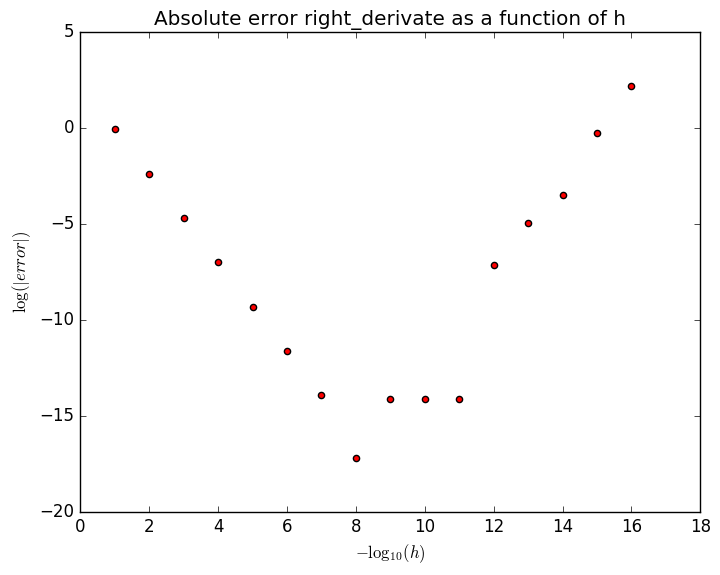

In [9]:
a = scatter(-log10(test_h), log(error_h),c="r", label = "right")
title("Absolute error right_derivate as a function of h")
xlabel(L"-\log_{10}(h)")
ylabel(L"\log(|error|)")
show()

Como bien se puede ver, el error **no** disminuye conforme `h` disminuye. Esto se dicutirá en los siguientes incisos pero ya podemos ver que nuestro error fue menor para `h = 10E-8` y que disminuyendo la `h` hizo que en algún punto se hiciera el error más grande que cuando se usó la aproximación intuitivamente más burda `h=1/10`.

## Derivada simétrica

Repitan el ejercicio anterior usando cómo definición de la derivada la versión *simétrica* de la definición de la derivada, es decir:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
\end{equation}



**Respuesta** Resulta muy fácil repetir las funciones anteriores de manera análoga:

In [10]:
"""
derivada_simetrica(f,x,h)

Calcula la derivada simétrica de f, una función por el método de las
diferencias finitas. Por default, evalúa en x = 0.0 y establece h=0.00001.
"""

function derivada_simetrica(f::Function)
    # Lo primero es pedir explícitamente que el tipo de f sea una función.
    # Después ponemos un valor default de h.
    h = 1./100000
    # Se calcula la derivada por el método usual y se regresa este valor.
    d = (f(h)-f(-h))/(2*h)
    return d
end

function derivada_simetrica(f::Function,x::Real)
    # En este método sólo cambia que se especifica un valor x Real en
    # donde se va a evaluar la derivada.
    h = 1./100000
    d = (f(x+h)-f(x-h))/(2*h)
    return d
end

function derivada_simetrica(f::Function,x::Real,h::Real)
    # Finalmente, este método da la libertad de poner un valor de h.
    d = (f(x+h)-f(x-h))/(2*h)
    return d
end

derivada_simetrica (generic function with 3 methods)

Ahora el arreglo de los errores:

In [11]:
test_hs = [0.1] # Inicializamos un arreglo con un valor de h = 1/10.
for i in 1:15 # Iteramos para llenar este arreglo con 1/10, 1/100,...
    # hasta 10^{-16}. 
    push!(test_hs, test_hs[i]/10)
end
error_hs = similar(test_hs) # Construímos un arreglo similar que vamos
# a llenar con los errores en función de cada h.
i = 1 # Un contador que va a decir el índice de error_hs
for h in test_hs # Iteramos sobre las h's y para cada una calculamos su
    # error con respecto a la derivada analítica fp y lo escribimos 
    # en la entrada correspondiente de error_hs
    error_hs[i] = abs(derivada_simetrica(f,1,h)-fp(1))
    i = i + 1 # Se aumenta el contador para que entre en la siguiente 
    # entrada de error_hs.
end
error_hs

16-element Array{Float64,1}:
 0.03       
 0.0003     
 3.0e-6     
 2.9995e-8  
 3.0321e-10 
 7.42677e-11
 8.13911e-10
 1.02883e-8 
 3.00574e-7 
 7.44663e-7 
 7.44663e-7 
 0.000356016
 0.00275261 
 0.029398   
 0.325873   
 4.55911    

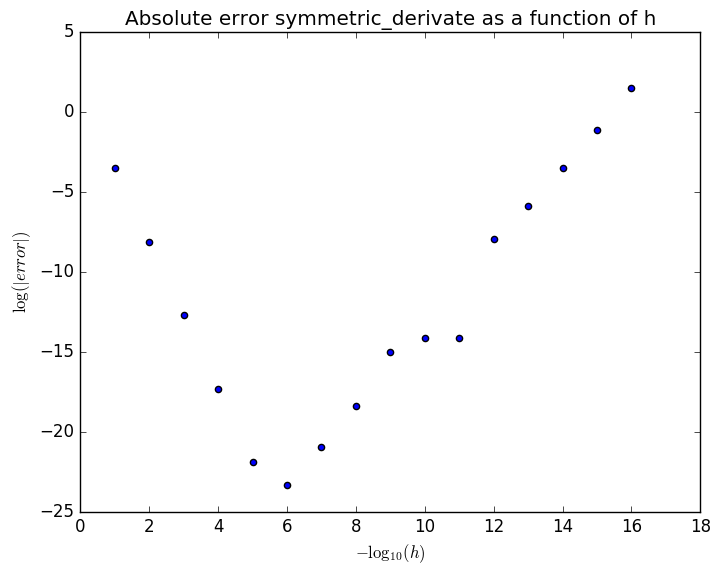

In [12]:
b = scatter(-log10(test_hs), log(error_hs), c = "b", label = "symmetric")
title("Absolute error symmetric_derivate as a function of h")
xlabel(L"-\log_{10}(h)")
ylabel(L"\log(|error|)")
show()

Una buena comparación es poner las dos gráficas, juntas para darnos una mejor idea del error:

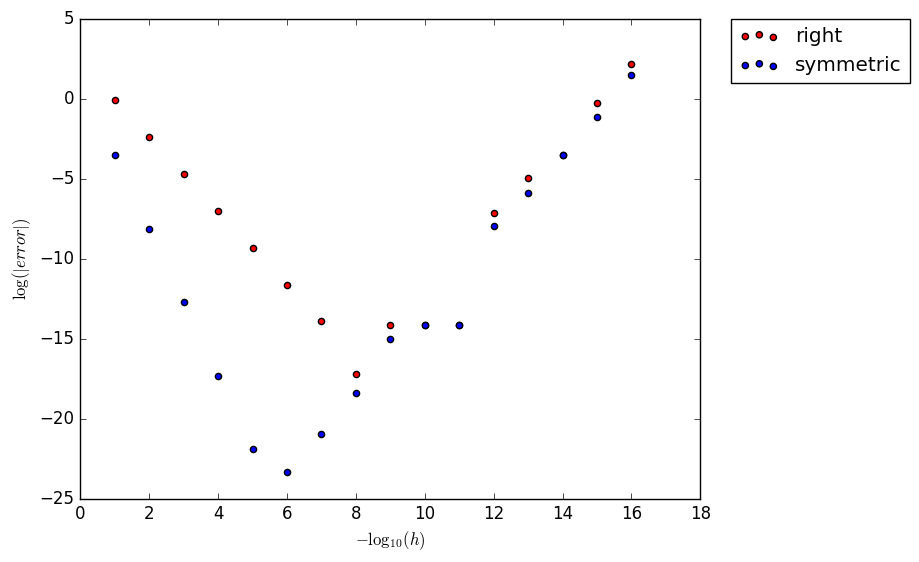

In [13]:
a = scatter(-log10(test_h), log(error_h),c="r", label = "right")
b = scatter(-log10(test_hs), log(error_hs), c = "b", label = "symmetric")
xlabel(L"-\log_{10}(h)")
ylabel(L"\log(|error|)")
legend(handles = [a,b],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
show()

Claramente el error para la derivada simétrica es menor, incuso por varios órdenes de magnitud en algunos casos. Sin embargo, el mejor valor se alcanza cuando `h=10E-6`, dos órdenes mayores que el valor óptimo para la derivada derecha. Esto ilustra muy bien la ventaja de la derivada simétrica sobre la derecha. Las desventajas es que a veces uno tiene un conjunto de datos discretos y no puede calcular derivadas simétricas para todos los puntos, i.e. los extremos de los puntos.

## Derivada *compleja*

Repitan el ejercicio anterior considerando ahora que el incremento de la variable independiente es infinitesimal e *imaginario*. Así, tenemos la definición:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \Im\Big(\frac{f(x_0+ i h)}{h}\Big).
\end{equation}


Debemos redefinir las funciones ligeramente:

In [14]:
g(z::Complex) = 3*z^3-2; gp(z::Complex) = 9*z^2;

La derivada compleja la hacemos modificando las dos funciones para que tengan su análogo complejo como se pide:

In [15]:
"""
derivada_complex(f,x,h)

Calcula la derivada derecha de f, una función real que se puede extender a 
variable compleja por el método de http://blogs.mathworks.com/cleve/2013/10/14/complex-step-differentiation/ 
considerando un incremento h imaginario. Por default se establece h=0.00001
y evalúa en x = 0. Obsérvese que el punto en donde se evalúa la derivada debe
ser un número real.
"""

function derivada_complex(f::Function)
    # Lo primero es pedir explícitamente que el tipo de f sea una función.
    # Después ponemos un valor default de h.
    h = 1./100000
    # Se calcula la derivada por el método usual y se regresa este valor
    # extrayendo la parte imaginaria como dice la fórmula.
    d = ((f(complex(0.0,h)))/h).im
    return d
end

function derivada_complex(f::Function,x::Real)
    # Lo único que cambia es que ahora se evalúa en un punto x distinto a cero.
    h = 1./100000
    d = ((f(complex(x,0.0)+complex(0.0,h)))/h).im
    return d
end

function derivada_complex(f::Function,x::Real,h::Real)
    # Finalmente se deja libre escoger la h.
    d = ((f(complex(x,0.0)+complex(0.0,h)))/h).im
    return d
end

derivada_complex (generic function with 3 methods)

In [16]:
derivada_complex(g)

-3.0000000000000005e-10

In [17]:
derivada_complex(g,1.0)

8.9999999997

In [18]:
derivada_complex(g,1.0,10E-10)

9.0

Habiendo definido las funciones se procede a calcular los errores:

In [19]:
test_hc = [0.1] # Inicializamos un arreglo con un valor de h = 1/10.
for i in 1:15 # Iteramos para llenar este arreglo con 1/10, 1/100,...
    # hasta 10^{-16}. 
    push!(test_hc, test_hc[i]/10)
end
error_hc = similar(test_hc) # Construímos un arreglo similar que vamos
# a llenar con los errores en función de cada h.
i = 1 # Un contador que va a decir el índice de error_hc
for h in test_hc # Iteramos sobre las h's y para cada una calculamos su
    # error con respecto a la derivada analítica gp y lo escribimos 
    # en la entrada correspondiente de error_hc
    error_hc[i] = abs(derivada_complex(g,1.0,h)-gp(complex(1.0,0.0)))
    i = i + 1 # Se aumenta el contador para que entre en la siguiente 
    # entrada de error_hc.
end
error_hc

16-element Array{Float64,1}:
 0.03       
 0.0003     
 3.0e-6     
 3.0e-8     
 3.0e-10    
 3.00027e-12
 2.84217e-14
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        

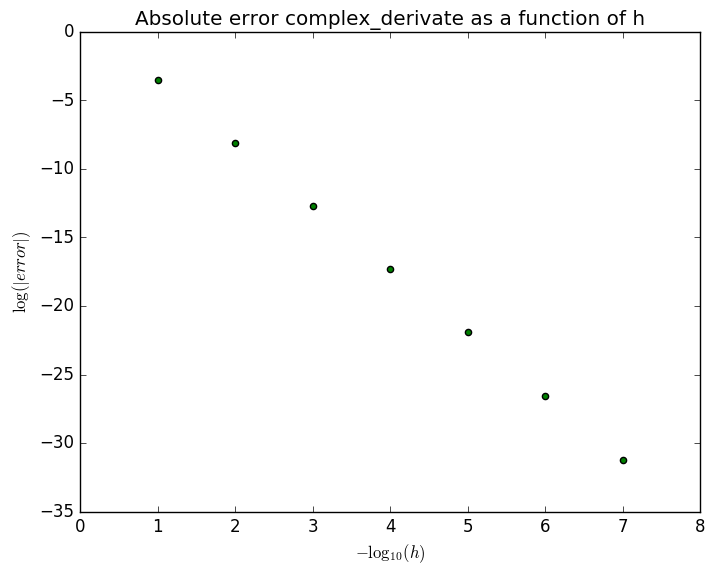

In [20]:
c = scatter(-log10(test_hc), log(error_hc),c="g", label = "complex")
title("Absolute error complex_derivate as a function of h")
xlabel(L"-\log_{10}(h)")
ylabel(L"\log(|error|)")
show()

Nótese que sólo se grafica hasta `h=10E-7` porque después el error es demasiado pequeño.

Finalmente juntamos las tres gráficas.

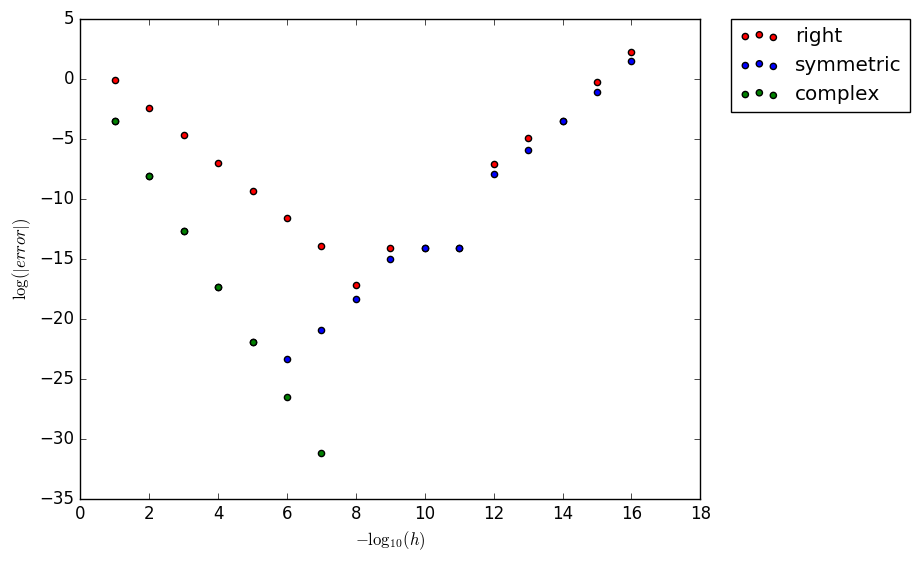

In [21]:
a = scatter(-log10(test_h), log(error_h),c="r", label = "right")
b = scatter(-log10(test_hs), log(error_hs), c = "b", label = "symmetric")
c = scatter(-log10(test_hc), log(error_hc),c="g", label = "complex")
xlabel(L"-\log_{10}(h)")
ylabel(L"\log(|error|)")
legend(handles = [a,b,c],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
show()

## Preguntas

- ¿Cuál de las definiciones anteriores es mejor en términos de dar el valor *más exacto* de la derivada? Den un argumento sólido de su conclusión en términos del tipo de convergencia hacia el valor exacto.

**Respuesta** En última gráfica se ve que el error absoluto siempre es menor para la derivada compleja. En cuanto a la convergencia también es la derivada compleja la que converge más rápidamente, esto se ve analizando la pendiente de la gráfica. Para ser precisos se ve que la derivada simétrica y compleja están superpuestas e inicialmente tienen una velocidad de convergencia igual que es de un orden superior a la derivda derecha. Sin embargo, aunque poseen rapidez de convergencia igual, rápidamente se ve que al disminuir `h`, el error en la derivada simétrica aumenta pero el de la derivada compleja sigue disminuyendo.

Lo anterior se puede respaldar con argumentos matemáticos precisos. Para la derivada derecha, expandiendo la serie de Taylor:

$$f(x+h)=f(x) + h\,f'(x) + h^2\,f''(x)/2+\ldots$$

se ve que la aproximación

$$f'(x) \approx \frac{f(x+h)-f(x)}{h}$$

deja errores de orden $h^2$. Ahora considere la derivada simétrica que surge de restar las dos series:

$$f(x+h)=f(x) + h\,f'(x) + h^2\,f''(x)/2+h^3\,f^{(3)}(x)/6\ldots$$

$$f(x-h)=f(x) - h\,f'(x) + h^2\,f''(x)/2 - h^3\,f^{(3)}(x)/6\ldots$$

de tal manera que el término en $h^2$ desaparece y el error es de orden $h^3$. Finalmente la derivada compleja

$$f(x+ih) = f(x) + ih\,f'(x) -h^2f''(x)/2 -ih^3\,f^{(3)}(x)/6\ldots $$

donde $f$ es una función compleja con continuación únicamente real sobre el eje real. Es decir, si $x\in \mathbb{R}$, $f(x)$ y $f'(x)$ también están en $\mathbb{R}$. Esta importante observación nos permite ver que la parte imaginaria del lado derecho de la ecuación anterior es

$$hf'(x) - h^3f^{(3)}(x)/6\ldots$$

Es decir, se salta el orden en $h^2$ así que el error también es de orden $h^3$. Esto se resume diciendo que con el método de la derivada derecha se converge linealmente y con los otros dos métodos se converge cuadráticamente.

- ¿Qué comportamiento de las derivadas en términos de $h$ nos incomoda (en lo más profundo de las entrañas)? ¿A qué se debe esto?

**Respuesta** El comportamiento que nos incomoda es que el error no disminuye cuando `h` se hace menor para los métodos de diferencias finitas. En efecto, lo que se ve es que más bien aumenta sin cota a partir de un valor de `h` que se aprecia en las gráficas ($h<10^{-8}$ para la derivada derecha y $h<10^{-6}$ para la simétrica).

Este fenómeno se llama la [cancelación catastrófica](https://en.wikipedia.org/wiki/Loss_of_significance) y viene de restar dos números muy parecidos de tal manera que su diferencia sea del orden de la última cifra guardada por los dos números. Por ejemplo, supongamos que tenemos un sistema que guarda siete cifras:

`x = 1/3 = 3.333333E-1` y otro número `y = 3.333334E-1`, restando obtenemos

`y - x = 0.000001E-1` pero el sistema debe reportarlo con siete cifras también así que diría que es `y - x = 1.000000E-7`. Pero esto arrastra un error gigantesco porque nosotros sabemos que si se reportara a ese nivel de cifras y `1/3` tuviera decimales infinitos, tendríamos `y - x = 1.333333E-7`. Esto no sucede porque la aritmética de números flotantes está limitada. Adicionalmente, nosotros estamos amplificando estos errores dividiendo esta diferencia por un número muy pequeño `h`.

En el caso de la derivada compleja, nada de esto sucede porque no se están tomando diferencias. La convergencia cuadrática es tal cual como se espera según la teoría del inciso anterior.